In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Log-likelihod

In [10]:
class RBM(object):
    def __init__(self, vis_unit, hidd_unit,temps=np.array(1)):
        self.vis_unit = vis_unit
        self.hidd_unit = hidd_unit
        self.temps=temps 
        #Initialise the parameters
        self.W = np.random.rand(self.vis_unit, self.hidd_unit)
    
################################################ Updating Parameters ##########################################        
    
            
    
    #Derivative of the log probability
    def VH(self, vis,hid):
        shvd = np.tensordot(vis,hid.T,axes=1)
        return shvd
        
   
    # Upgrade the gradient     
    def W_Update(self, vis):
        #Positive phase
        hid=self.forward_pass(vis)
        der_W1 =self.VH(vis,hid) 
    
        #Negative phase
        vis_r = self.reconstruction(self.CD_k, vis)
        hid_r= self.forward_pass(vis_r)
        der_W2 = self.VH(vis_r,hid_r)
        der_W=-der_W2+der_W1
        #der_W=der_W/np.sqrt(np.sum(der_W**2)/(self.hidd_unit*self.vis_unit))
        
        #Updating the parameters
        self.W = self.W + self.learning_rate*der_W/vis.shape[1]

    
########################################### Reconstruction ####################################################       
        
     #Calculate the hidden states 
    def forward_pass(self, vis):
        X = np.tensordot(self.W.T, vis, axes=1)
        p_h = 1.0/(1.0+np.exp(-2*X))
        hid  = 2*(p_h>np.random.rand(self.hidd_unit, vis.shape[1]))-1
        return hid            
            
    # Reconstruct the visible states   
    def backward_pass(self, hid):
        X = np.tensordot(self.W,hid,axes=1)
        p_v = 1.0/(1.0+np.exp(-2*X))
        v_r = 2*(p_v>np.random.rand(self.vis_unit,hid.shape[1]))-1
        return v_r
            
    # Perform Gibbs Sampling
    def reconstruction(self, steps, vis):
        vis_r=vis
        for i in np.arange(steps):
            hid = self.forward_pass(vis_r)
            vis_r = self.backward_pass(hid)
        return vis_r
    
############################################# Training ########################################################

    #Training Model    
    def learn(self, training_data, learning_rate=0.01, epochs=10, batch_size=1, CD_k=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.CD_k = CD_k
        
        num_batches = int(training_data.shape[0]/self.batch_size)
        self.error_history=np.zeros(self.epochs)
        
        for k in np.arange(self.epochs):
            error = 0
            for b in np.arange(0, num_batches):
                batch = training_data[int(b*self.batch_size):int((b+1)*self.batch_size)]
                vis=batch.T
                self.W_Update(vis)
                samples = self.reconstruction(1, vis)
                error += 0.25*np.sum((vis - samples)**2)/np.prod(vis.shape)
            error=error/num_batches
            self.error_history[k]=error
            print('Epoch:%d,Training error:%f'%(k, error))



In [11]:
training_data = np.loadtxt('/Users/chuene/Documents/PhD/Pallab/filename.txt')

In [12]:
data = training_data.reshape(10000,100)

In [13]:
new_data = data[1000:,:]

In [14]:
new_data_train = new_data[:8000]

In [15]:
new_data_test = new_data[8000:]

Epoch:0,Training error:0.325114
Epoch:1,Training error:0.264131
Epoch:2,Training error:0.241210
Epoch:3,Training error:0.229848
Epoch:4,Training error:0.223387
Epoch:5,Training error:0.217452
Epoch:6,Training error:0.213342
Epoch:7,Training error:0.210041
Epoch:8,Training error:0.206865
Epoch:9,Training error:0.204686
Epoch:10,Training error:0.202703
Epoch:11,Training error:0.201675
Epoch:12,Training error:0.199379
Epoch:13,Training error:0.198832
Epoch:14,Training error:0.197155
Epoch:15,Training error:0.196250
Epoch:16,Training error:0.195861
Epoch:17,Training error:0.194675
Epoch:18,Training error:0.193709
Epoch:19,Training error:0.193811
Epoch:20,Training error:0.192903
Epoch:21,Training error:0.191954
Epoch:22,Training error:0.191894
Epoch:23,Training error:0.191389
Epoch:24,Training error:0.191040
Epoch:25,Training error:0.190851
Epoch:26,Training error:0.191630
Epoch:27,Training error:0.190871
Epoch:28,Training error:0.190609
Epoch:29,Training error:0.189865
Epoch:30,Training er

Text(0, 0.5, 'error')

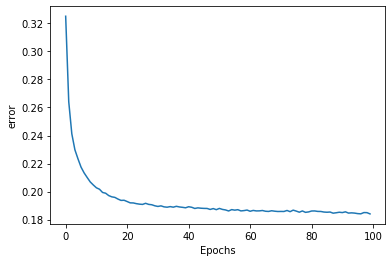

In [16]:
rbm1 = RBM(vis_unit = 100, hidd_unit=20)
model = rbm1.learn(training_data=new_data_train, learning_rate=0.01,epochs=100, CD_k=1, batch_size=50)

plt.plot(np.arange(100), rbm1.error_history)
plt.xlabel("Epochs")
plt.ylabel("error")

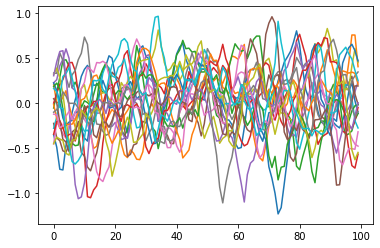

In [17]:
plt.plot(np.arange(100), rbm1.W)

In [18]:
rbm1.W

array([[-0.34808865,  0.20417556, -0.0521213 , ..., -0.09863825,
        -0.44843081,  0.16537065],
       [-0.48738766,  0.00731222,  0.12060624, ..., -0.06959406,
        -0.37606057,  0.12996064],
       [-0.73226085,  0.01551092,  0.29112668, ...,  0.01127827,
        -0.39614295, -0.04709304],
       ...,
       [ 0.22873018,  0.75836883, -0.30581332, ..., -0.05121332,
        -0.51815563,  0.49103104],
       [ 0.02883278,  0.75777263, -0.18103807, ..., -0.14952675,
        -0.62645174,  0.36498057],
       [-0.10954606,  0.40671453, -0.11412357, ..., -0.08937051,
        -0.54533312,  0.25284863]])

# Cross-Entropy

In [9]:
class RBM(object):
    def __init__(self, vis_unit, hidd_unit,temps=np.array(1)):
        self.vis_unit  = vis_unit
        self.hidd_unit = hidd_unit
        self.temps     = temps
        
        #Initialise the parameters
        self.W         = np.random.rand(self.vis_unit, self.hidd_unit)
        
################################################ Updating Parameters ##########################################        
    
            
    
    #Derivative of the Cross-Entropy
    def VH(self, vis,hid):
        shvd = np.tensordot(vis,hid.T,axes=1)
        return shvd
        
   
    # Upgrade the gradient     
    def W_Update(self, vis):
        #Positive phase
        hid    = self.forward_pass(vis)
        der_W1 = self.VH(vis,hid) 
        
        
        #Negative phase
        vis_r  = self.reconstruction(self.CD_k, vis)
        hid_r  = self.forward_pass(vis_r)
        der_W2 = self.VH(vis_r,hid_r) 
        der_W  = self.vis_unit * der_W2 - self.vis_unit * der_W1
    
    
        #Updating the parameters
        self.W = self.W + self.learning_rate * der_W/vis.shape[1]
        
        
    
    

    
    # Finding the derivative of the Cross-Entropy and updating the Weights
    def gradient(self,vis):
        p_h = self.forward_pass(vis)
        
        # Derivative of the Cross-Entropy: this is a chainrule.
        # Derivative of the Cross-Entropy with respect to the probability 
        grad1 = -np.tensordot(vis, p_h.T, axes=1) + np.tensordot((1-vis),(1-p_h).T, axes=1)
        
        # Derivative of the probability with 
        grad2 = np.tensordot(p_h,(1-p_h).T,axes=1)
        grad3 = self.vis_unit
        grad4 = np.tensordot(grad1,grad2,axes=1)*grad3
        
        #Updating the weights
        self.W = self.W - self.learning_rate * grad4/vis.shape[1]
        

        
########################################### Reconstruction ####################################################       
        
     #Calculate the hidden states 
    def forward_pass(self, vis):
        X = np.tensordot(self.W.T, vis, axes=1)
        p_h = 1.0/(1.0+np.exp(-2*X))
        hid  = 2*(p_h>np.random.rand(self.hidd_unit, vis.shape[1]))-1
        return hid            
            
    # Reconstruct the visible states   
    def backward_pass(self, hid):
        X = np.tensordot(self.W,hid,axes=1)
        p_v = 1.0/(1.0+np.exp(-2*X))
        v_r = 2*(p_v>np.random.rand(self.vis_unit,hid.shape[1]))-1
        return v_r
            
    # Perform Gibbs Sampling
    def reconstruction(self, steps, vis):
        vis_r=vis
        for i in np.arange(steps):
            hid = self.forward_pass(vis_r)
            vis_r = self.backward_pass(hid)
        return vis_r
    
############################################# Training ########################################################

    #Training Model    
    def learn(self, training_data, learning_rate=0.01, epochs=10, batch_size=1, CD_k=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.CD_k = CD_k
        
        num_batches = int(training_data.shape[0]/self.batch_size)
        self.error_history=np.zeros(self.epochs)
        
        for k in np.arange(self.epochs):
            error = 0
            for b in np.arange(0, num_batches):
                batch = training_data[int(b*self.batch_size):int((b+1)*self.batch_size)]
                vis=batch.T
                self.W_Update(vis)
                #self.gradient(vis)
                samples = self.reconstruction(self.CD_k,vis)
                error += 0.25*np.sum((vis - samples)**2)/np.prod(vis.shape)
            error=error/num_batches
            self.error_history[k]=error
            print('Epoch:%d,Training error:%f'%(k, error))



In [10]:
training_data = np.loadtxt('/Users/chuene/Documents/PhD/Pallab/filename.txt')

In [11]:
data = training_data.reshape(10000,100)

In [12]:
new_data = data[1000:,:]

In [13]:
new_data_train = new_data[:8000]

In [14]:
new_data_test = new_data[8000:]

/Users/chuene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/chuene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in exp


Epoch:0,Training error:0.389870
Epoch:1,Training error:0.389029
Epoch:2,Training error:0.389045
Epoch:3,Training error:0.389053
Epoch:4,Training error:0.389053
Epoch:5,Training error:0.389053
Epoch:6,Training error:0.389053
Epoch:7,Training error:0.389053
Epoch:8,Training error:0.389053
Epoch:9,Training error:0.389053
Epoch:10,Training error:0.389053
Epoch:11,Training error:0.389053
Epoch:12,Training error:0.389053
Epoch:13,Training error:0.389053
Epoch:14,Training error:0.389053
Epoch:15,Training error:0.389053
Epoch:16,Training error:0.389053
Epoch:17,Training error:0.389053
Epoch:18,Training error:0.389053
Epoch:19,Training error:0.389053
Epoch:20,Training error:0.389053
Epoch:21,Training error:0.389053
Epoch:22,Training error:0.389053
Epoch:23,Training error:0.389053
Epoch:24,Training error:0.389053
Epoch:25,Training error:0.389053
Epoch:26,Training error:0.389053
Epoch:27,Training error:0.389053
Epoch:28,Training error:0.389053
Epoch:29,Training error:0.389053
Epoch:30,Training er

Text(0, 0.5, 'error')

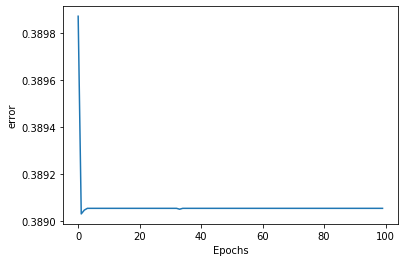

In [17]:
rbm2 = RBM(vis_unit = 100, hidd_unit=50)
model = rbm2.learn(training_data=new_data_train, learning_rate=0.001,epochs=100, CD_k=1, batch_size=50)

plt.plot(np.arange(100), rbm2.error_history)
plt.xlabel("Epochs")
plt.ylabel("error")